In [2]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import theano
theano.config.compute_test_value = 'off'
theano.config.compute_test_value

'off'

# Introduction

The purpose of this notebook is to show Bayesian hierarchical models.

Hierarchical models are used in modelling things like baseball batting averages or housing prices. It's useful when we have some "population" parameter that we think influences an individual sample's parameter. Let's dive in to see how this works. 

In [4]:
# def ecdf_scatter(data):
#     x, y = np.sort(data), np.arange(1, len(data)+1) / len(data)
#     return x, y

# x1, y1 = ecdf_scatter(np.random.beta(1, 1, size=1000))
# x2, y2 = ecdf_scatter(np.random.beta(2, 10, size=1000))
# x3, y3 = ecdf_scatter(np.random.beta(46, 200, size=1000))

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.scatter(x1, y1, label="(1, 1)")
# ax.scatter(x2, y2, label="(2, 10)")
# ax.scatter(x3, y3, label="(46, 200)")
# ax.legend()

We will use the baseball dataset from Efron & Morris. It's pretty famous, and can be downloaded from the PyMC3 website.

In [5]:
data = pd.read_csv('datasets/baseball.tsv', sep='\t')
# data = pm.floatX(data)
data.dtypes
datacols = list(data.columns)
datacols.remove('FirstName')
datacols.remove('LastName')
data[datacols] = pm.floatX(data[datacols])
data.dtypes

FirstName            object
LastName             object
At-Bats             float32
Hits                float32
BattingAverage      float32
RemainingAt-Bats    float32
RemainingAverage    float32
SeasonAt-Bats       float32
SeasonHits          float32
SeasonAverage       float32
dtype: object

Given this population data, let's now say that we have a rookie player with just six at bats and all of them were hit. Is this a genius player to keep for the season? Bayesian statistics may help us get to an answer.

In [7]:
# Firstly, we estimate the population batting average.
with pm.Model() as baseball_model:
    atbats = pm.floatX(data['SeasonAt-Bats'].values)
    hits = pm.floatX(data['SeasonHits'].values)
    
    a = pm.Exponential('alpha_prior', 
                       lam=5) # testval=a_testval)
    b = pm.Exponential('beta_prior', 
                       lam=5) #testval=b_testval)
    p_population = pm.Beta('p_population', 
                           alpha=a, 
                           beta=b) # testval=p_testval)
    likelihood = pm.Binomial('likelihood', 
                             n=atbats, 
                             p=p_population, 
                             observed=hits)
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 94.98:   5%|▌         | 10298/200000 [00:04<01:14, 2545.67it/s] 
Convergence archived at 10400
Interrupted at 10,400 [5%]: Average Loss = 313.28
100%|██████████| 2500/2500 [00:05<00:00, 435.43it/s]


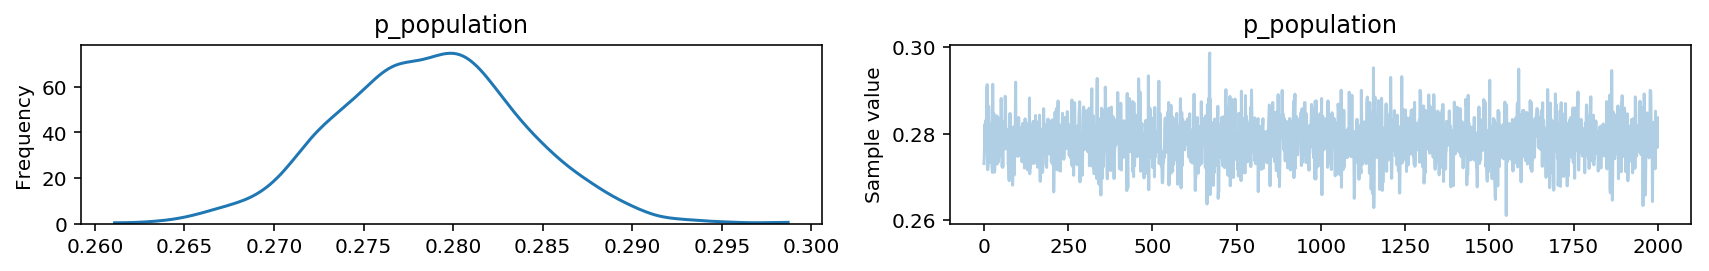

In [31]:
with baseball_model:
    pm.traceplot(trace, varnames=['p_population'])

In [ ]:
with pm.Model() as new_player_model:
    p_prior = 